In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [228]:
data=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Dataset\bear TS.csv")
data.head()

,Values,Date
0,284.4,01-01-2006
1,212.8,01-02-2006
2,226.9,01-03-2006
3,308.4,01-04-2006
4,262.0,01-05-2006


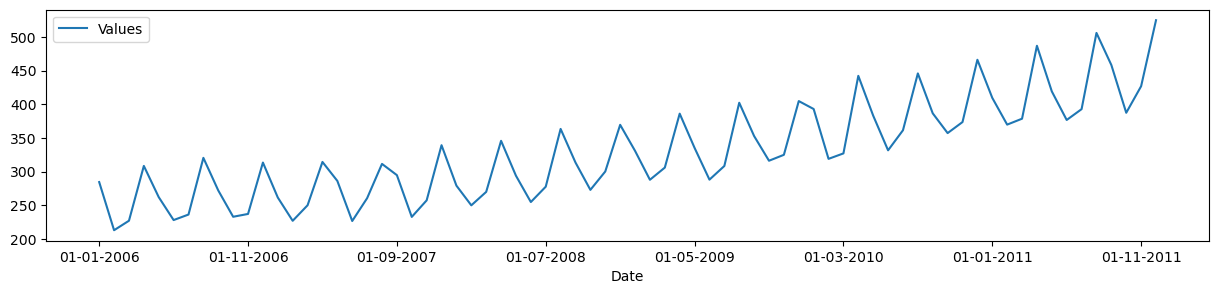

In [230]:
data.plot.line(x = 'Date',y = 'Values',figsize=(15,3))
plt.show()  

In [232]:
data2=data.set_index('Date')
data2

,Values
Date,
01-01-2006,284.4
01-02-2006,212.8
01-03-2006,226.9
01-04-2006,308.4
01-05-2006,262.0
...,...
01-08-2011,506.1
01-09-2011,458.4
01-10-2011,387.4


In [234]:
print(data2.min())

Values    212.8
dtype: float64


In [236]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params

{'smoothing_level': 0.1830029920485114,
 'smoothing_trend': 0.18300295874655811,
 'smoothing_seasonal': 3.0969862363814293e-06,
 'damping_trend': nan,
 'initial_level': 243.31013244620937,
 'initial_trend': 0.6825607925721694,
 'initial_seasons': array([1.09605363, 0.92697762, 0.96640597, 1.24782065, 1.07067928,
        0.91739187, 0.97753642, 1.24071526, 1.08777592, 0.93537886,
        0.99097932, 1.23382824]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [238]:
data2["Level"] = round(model2.level)
data2["Trend"] = round(model2.trend)
data2["Seasonal"] = round(model2.season)
data2["Forecast"] = round(model2.fittedvalues)
data2.head()

,Values,Level,Trend,Seasonal,Forecast
Date,,,,,
01-01-2006,284.4,247.0,1.0,1.0,267.0
01-02-2006,212.8,245.0,1.0,1.0,230.0
01-03-2006,226.9,243.0,0.0,1.0,237.0
01-04-2006,308.4,244.0,0.0,1.0,304.0
01-05-2006,262.0,245.0,0.0,1.0,262.0


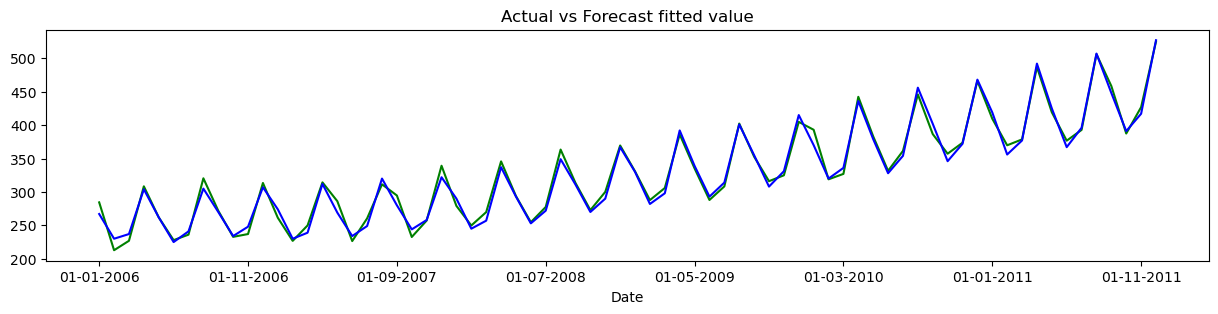

In [240]:
plt.title("Actual vs Forecast fitted value")
data2.Values.plot(color='green')
data2.Forecast.plot( color='blue',figsize=(15,3))
plt.show()

In [242]:
Forecast2=np.round(model2.forecast(36),2)
Forecast2

72     472.02
73     403.02
74     424.14
75     552.78
76     478.72
77     413.95
78     445.11
79     570.06
80     504.26
81     437.46
82     467.55
83     587.20
84     526.14
85     448.79
86     471.86
87     614.40
88     531.58
89     459.25
90     493.38
91     631.32
92     557.97
93     483.65
94     516.48
95     648.12
96     580.26
97     494.56
98     519.58
99     676.01
100    584.45
101    504.55
102    541.65
103    692.58
104    611.68
105    529.84
106    565.41
107    709.04
dtype: float64

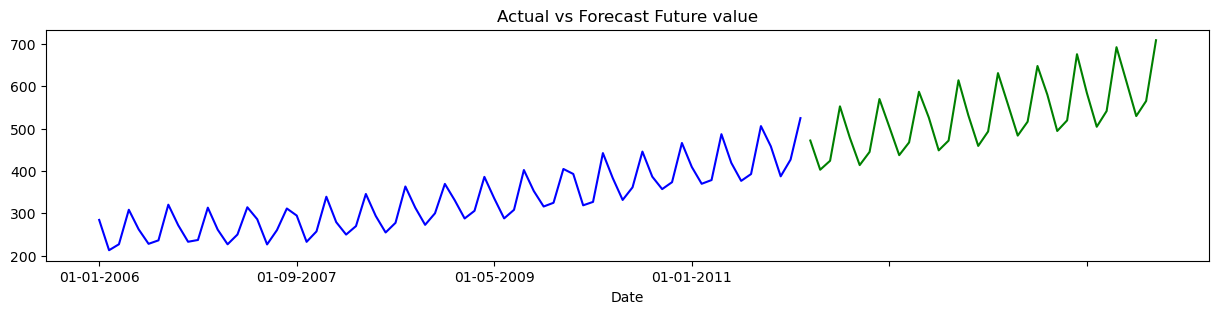

In [244]:
plt.title("Actual vs Forecast Future value")
Forecast2.plot(color='green')
data2.Values.plot(color='blue',figsize=(15,3))
plt.show()